# Data Wrangling Data from Web

## URLs

In [5]:
from urllib.request import urlretrieve
import pandas as pd

url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'winequality-red.csv')

df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# Need to install xlrd to read Excel files
! pip install xlrd

     |████████████████████████████████| 96 kB 1.8 MB/s eta 0:00:01


In [9]:
url = 'https://assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Save file locally
urlretrieve(url, 'latitude.xls')

# Read in all sheets of Excel file
xls = pd.read_excel(url, sheet_name=None)

print(xls.keys())

xls['1700'].head()

dict_keys(['1700', '1900'])


,country,1700
0,Afghanistan,34.565000
1,Akrotiri and Dhekelia,34.616667
2,Albania,41.312000
3,Algeria,36.720000
4,American Samoa,-14.307000


## HTTP requests

In [18]:
from urllib.request import urlopen, Request

url = "https://en.wikipedia.org/wiki/Analytics"

# This packages the request
request = Request(url)

# Sends the request and catches the response
response = urlopen(request)

print(type(response))

response.close()

<class 'http.client.HTTPResponse'>


In [17]:
# url = "https://en.wikipedia.org/wiki/Analytics"

# request = Request(url)

# response = urlopen(request)

# Extract the response
html = response.read()

print(html)
response.close()

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Analytics - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"4a6b1891-55ed-428f-8d53-b08baae070f0","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Analytics","wgTitle":"Analytics","wgCurRevisionId":1089782426,"wgRevisionId":1089782426,"wgArticleId":487132,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: multiple names: authors list","Webarchive template wayback links","Articles with short description","Short description matches Wikidata","Use mdy da

In [16]:
import requests

url = "https://en.wikipedia.org/wiki/Analytics"

# Packages the request, send the request and catch the response
r = requests.get(url)

# Extract the response
text = r.text

# Print the html
print(text)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Analytics - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"4a6b1891-55ed-428f-8d53-b08baae070f0","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Analytics","wgTitle":"Analytics","wgCurRevisionId":1089782426,"wgRevisionId":1089782426,"wgArticleId":487132,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: multiple names: authors list","Webarchive template wayback links","Articles with short description","Short description matches Wikidata","Use mdy dates fro

## Web Scraping with BeautifulSoup

In [13]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.python.org/~guido/'

r = requests.get(url)

html_doc = r.text

# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object
pretty_soup = soup.prettify()

print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <!-- Built from main -->
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="images/df20000406.jpg">
    Who I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a href="Public

In [14]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.python.org/~guido/'

r = requests.get(url)

html_doc = r.text

soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage
guido_title = soup.title

# Title of Guido's webpage
print(guido_title)

# Get Guido's text
guido_text = soup.get_text()

print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page





Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

I am currently a Distinguished Engineer at Microsoft.
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but I receive too much email to respond
to everything.

My Name
My name often poses difficulties for Americans.

Pronunciation: in Dutch, the "G" in Guido is a hard G,
pronounced roughly like the "ch" in Scottish "l

In [15]:
url = 'https://www.python.org/~guido/'

r = requests.get(url)

html_doc = r.text

soup = BeautifulSoup(html_doc)

print(soup.title)

# Find all 'a' tags (which define hyperlinks)
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

<title>Guido's Personal Home Page</title>
pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
images/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
Resume.html
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


## Importing data from API's
### omdbapi

In [ ]:
import json
with open("a_movie.json") as json_file:
    json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

In [20]:
import requests
# Assign URL to variable: url
url = 'http://www.omdbapi.com/?t=hackers'

# Package the request, send the request and catch the response: r
r = requests.get(url)

print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin, Ben Mezrich","Actors":"Jesse Eisenberg, Andrew Garfield, Justin Timberlake","Plot":"As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"United States","Awards":"Won 3 Oscars. 172 wins & 186 nominations total","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.8/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.8","imdbVotes":"684,190","imdbID":"tt1285016","Type":"movie","DV

In [21]:
# Decode the JSON data into a dictionary
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin, Ben Mezrich
Actors:  Jesse Eisenberg, Andrew Garfield, Justin Timberlake
Plot:  As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  United States
Awards:  Won 3 Oscars. 172 wins & 186 nominations total
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.8
imdbVotes:  684,190
imdbID:  tt1285016
Type:  movie
DVD:  11 Jan 2011
BoxOffice:  $

### wikipedia

In [22]:
url = 'https://en.wikipedia.org/w/?t=hackers'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<link rel="mw-deduplicated-inline-style" href="mw-data:TemplateStyles:r1033289096">
<p class="mw-empty-elt">
</p>
<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a dish of  Italian origin consisting of a usually round, flat base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as anchovies, mushrooms, onions, olives, vegetables, meat, ham, etc.), which is then baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta. A person who makes pizza is known as a <b>pizzaiolo</b>.
</p><p>In Italy, pizza served in a restaurant is presented unsliced, and is eaten with the use of a knife and fork. In casual settings, however, it is cut into wedges to be eaten while held in the hand.
</p><p

### tweeter

In [ ]:
import tweepy, json
consumer_key = "?"
consumer_secret = "?"
access_token = "?"
access_token_secret = "?"

stream = tweepy.Stream(consumer_key, consumer_secret, access_token, access_token_secret)

# Filter your Stream variable
stream.filter(track=["clinton", "trump", "sanders", "cruz"])

In [27]:
import json

tweets_data_path = 'tweets3.txt'

# Initialize empty list to store tweets
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


In [28]:
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text','lang'])

df.head()

,text,lang
0,RT @bpolitics: .@krollbondrating's Christopher...,en
1,RT @HeidiAlpine: @dmartosko Cruz video found.....,en
2,Njihuni me Zonjën Trump !!! | Ekskluzive https...,et
3,Your an idiot she shouldn't have tried to grab...,en
4,RT @AlanLohner: The anti-American D.C. elites ...,en


In [30]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])

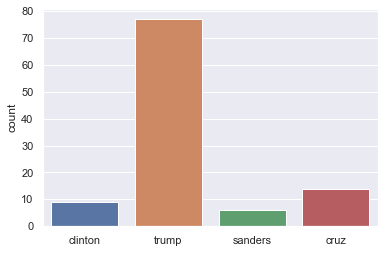

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

# Create a list of labels
cd = ['clinton', 'trump', 'sanders', 'cruz']
# Plot the bar chart
ax = sns.barplot(x=cd, y=[clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()